In [65]:
!pip install aif360


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [387]:
from aif360.datasets import AdultDataset
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("/Users/sofianeagounikaci/bnp/adult.csv")

In [388]:
import numpy as np

pd.set_option("display.max_columns", 14)


In [389]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [390]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [391]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,...,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,...,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,...,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,...,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,...,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,...,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,...,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,...,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,...,White,Male,0,0,20,United-States,<=50K


In [393]:
var_cat = data.select_dtypes(["object"]).columns


In [394]:
var_cat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'target'],
      dtype='object')

In [395]:
for var in var_cat:
    print(data[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [396]:
data1=data.replace(" ?",np.nan)

In [397]:
data1.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [398]:
data2=data1.dropna()
data2=data2.drop("fnlwgt",axis=1)

In [399]:
data2.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [400]:
data2["target"].value_counts()

target
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [401]:
from sklearn.preprocessing import LabelEncoder

label=[]

for var in var_cat:
    le=LabelEncoder()
    data2[var]=le.fit_transform(data2[var])


In [402]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,11,9,4,0,3,4,1,0,0,20,38,0


In [403]:
from sklearn.model_selection import train_test_split


In [443]:
trainset,testset=train_test_split(data2,test_size=0.2, random_state=0)

In [432]:
dataset = BinaryLabelDataset(
    df=trainset, 
    label_names=["target"], 
    protected_attribute_names=["sex"]  # ATTENTION : nom exact de la colonne
)

# Réparateur
di = DisparateImpactRemover(repair_level=0.1)
dataset_train = di.fit_transform(dataset)

In [433]:
dataset_train 

               instance weights features                                    \
                                                                             
                                     age workclass education education-num   
instance names                                                               
30461                       1.0     34.0       2.0      15.0          10.0   
18186                       1.0     51.0       2.0      11.0           9.0   
24974                       1.0     50.0       2.0      11.0           9.0   
25659                       1.0     52.0       4.0      15.0          10.0   
13876                       1.0     31.0       2.0      11.0           9.0   
...                         ...      ...       ...       ...           ...   
14169                       1.0     66.0       1.0      10.0          16.0   
21206                       1.0     50.0       2.0      12.0          14.0   
10646                       1.0     50.0       2.0       9.0    

In [434]:
X = dataset_train.features

# Labels
y = dataset_train.labels.ravel()   # ravel() pour transformer en 1D

# Protected attributes
protected = dataset_train.protected_attributes.ravel()

# Construire un DataFrame
dataset_train = pd.DataFrame(X, columns=dataset_train.feature_names)
dataset_train["target"] = y

In [435]:
trainset=dataset_train

In [436]:
y_train=trainset["target"]
X_train=trainset.drop(["target"],axis=1)

In [438]:
y_test=testset["target"]
X_test=testset.drop(["target"],axis=1)

In [439]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -----------------------------
# 7️⃣ Prédiction
# -----------------------------
y_pred = rf.predict(X_test)

# -----------------------------
# 8️⃣ Évaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -----------------------------
# 9️⃣ Matrice de confusion + heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# 🔟 Feature importance (barplot)
# -----------------------------
importances = rf.feature_importances_
feature_names = X_test.columns

# Créer un DataFrame pour mieux trier
feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_df)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Accuracy: 0.8433615116857285
Precision: 0.7213375796178344
Recall: 0.603597601598934
F1 Score: 0.6572361262241567

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4532
           1       0.72      0.60      0.66      1501

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



/var/folders/mn/00nrtk954xz7d4884fwbdgtr0000gn/T/ipykernel_20308/2671945570.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/mn/00nrtk954xz7d4884fwbdgtr0000gn/T/ipykernel_20308/2671945570.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [440]:
X_test["target"]=y_pred

In [441]:
X_test

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
2135,44,2,11,9,4,11,1,1,0,0,0,40,38,0.0
15639,21,2,15,10,4,0,3,4,1,0,0,20,38,0.0
29059,36,2,15,10,2,13,0,4,1,0,0,40,38,0.0
27523,30,4,8,11,0,2,1,4,1,0,0,49,38,0.0
9280,42,4,15,10,2,2,0,4,1,0,0,40,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,46,2,15,10,2,11,0,4,1,15024,0,40,38,1.0
5031,63,4,9,13,2,11,0,4,1,0,0,30,38,0.0
18671,45,2,0,6,2,2,0,4,1,0,0,60,38,0.0
10118,41,2,15,10,2,13,0,4,1,0,0,65,38,1.0


In [442]:
X_test["target"]=y_pred

dataset = BinaryLabelDataset(
    df=X_test,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
) 
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3248
Statistical Parity Difference: -0.1792
Base Rate (privileged): 0.2654
Base Rate (unprivileged): 0.0862
Mean Difference: -0.1792


In [277]:
rf

RandomForestClassifier(random_state=42)

In [208]:
data6=pd.read_csv("/Users/sofianeagounikaci/bnp/adult.csv")
data6["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [206]:
data["sex"].value_counts()

sex
1    21790
0    10771
Name: count, dtype: int64

In [207]:
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,...,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,...,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,...,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,...,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,...,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,...,White,0,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,...,White,0,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,...,White,0,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,...,White,0,0,0,20,United-States,0


In [171]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric



dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
)

In [173]:
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
    
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}

In [174]:
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3622
Statistical Parity Difference: -0.2002
Base Rate (privileged): 0.3138
Base Rate (unprivileged): 0.1137
Mean Difference: -0.2002


In [ ]:


### 1️⃣ Disparate Impact (DI) = 0.3622

* DI = $P(Y=1|unprivileged) / P(Y=1|privileged)$
* Ici : 0.3622 < 1 → le **groupe non-privilégié (femmes)** a beaucoup moins de chances d’obtenir un label positif (`>50K`) que le groupe privilégié (hommes).
* **Interprétation** : le biais est important.

---

### 2️⃣ Statistical Parity Difference (SPD) = -0.2002

* SPD = $P(Y=1|unprivileged) - P(Y=1|privileged)$
* Ici : -0.2002 → différence négative → le **groupe non-privilégié** est désavantagé d’environ 20%.

---

### 3️⃣ Base Rate (privileged) = 0.3138, Base Rate (unprivileged) = 0.1137

* Taux de labels positifs pour chaque groupe :

  * Hommes (privileged) : 31.38% ont un revenu >50K
  * Femmes (unprivileged) : 11.37% ont un revenu >50K
* **Conclusion** : un vrai déséquilibre dans les données.

---

### 4️⃣ Mean Difference = -0.2002

* Equivalent au SPD, mesure la différence moyenne de probabilité d’avoir un label positif.
* Ici encore, montre que le **groupe non-privilégié est désavantagé**.


In [178]:
data1["race"].value_counts()

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

In [179]:
data2["race"].value_counts()

race
4    25933
2     2817
1      895
0      286
3      231
Name: count, dtype: int64

In [185]:
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["race"]    # votre variable protégée
)
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"race": 4}],
    unprivileged_groups=[{"race": 2}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.4927
Statistical Parity Difference: -0.1338
Base Rate (privileged): 0.2637
Base Rate (unprivileged): 0.1299
Mean Difference: -0.1338


In [ ]:
Parfait 👍, regardons ce que signifient ces metrics pour le **biais racial** dans ton dataset Adult (White vs Black) :

---

### 1️⃣ Disparate Impact (DI) = 0.4927

* DI = $P(Y=1|unprivileged) / P(Y=1|privileged)$
* Ici : 0.4927 < 1 → le **groupe non-privilégié (Black)** a environ **la moitié des chances** du groupe privilégié (White) d’avoir un revenu >50K.
* **Conclusion** : il existe un biais racial important dans les données.

---

### 2️⃣ Statistical Parity Difference (SPD) = -0.1338

* SPD = $P(Y=1|unprivileged) - P(Y=1|privileged)$
* Ici : -0.1338 → le **groupe Black** est désavantagé d’environ 13,4% par rapport au groupe White.

---

### 3️⃣ Base Rate (privileged vs unprivileged)

* White (privileged) : 26.37% ont un revenu >50K
* Black (unprivileged) : 12.99% ont un revenu >50K
* **Observation** : il y a une différence notable dans les labels positifs.

---

### 4️⃣ Mean Difference = -0.1338

* Même information que SPD : le groupe non-privilégié est désavantagé.

---

### 🔹 Interprétation globale

* Les données montrent un **biais racial contre le groupe Black** : moins de chances de label positif (>50K).
* Les métriques DI et SPD sont **moins sévères que le biais sexuel**, mais restent significatives.
* Cela indique que, si on entraîne un modèle ML directement sur ces données, **le modèle pourrait reproduire ce biais**.

---

Si tu veux, je peux te créer **un barplot comparatif du biais pour sexe et race**, pour visualiser rapidement **les déséquilibres dans les données Adult**.

Veux que je fasse ça ?


In [186]:
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["race"]    # votre variable protégée
)
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"race": 4}],
    unprivileged_groups=[{"race": 3}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3447
Statistical Parity Difference: -0.1728
Base Rate (privileged): 0.2637
Base Rate (unprivileged): 0.0909
Mean Difference: -0.1728


In [200]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv("/Users/sofianeagounikaci/bnp/adult.csv")
data = data.dropna()

# Nettoyer les espaces dans les colonnes textuelles
for col in data.select_dtypes(include="object"):
    data[col] = data[col].str.strip()

# -----------------------------
# 2️⃣ Encoder toutes les colonnes catégorielles
# -----------------------------
cat_cols = data.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Renommer la target pour AIF360
data.rename(columns={"income": "target"}, inplace=True)




In [217]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,...,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,...,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,...,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,...,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,...,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,...,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,...,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,...,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,...,4,1,0,0,20,39,0


In [219]:
!pip install BlackBoxAuditing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 595.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'BlackBoxAuditing' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'BlackBoxAuditing'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394753 sha256=b9cf0c3fe2a5964420913b0121831048d444f05a2d0273db6d2ee3ca7f69af01
  Stored in directory: /Users/sofianeagounikaci/Library/Caches/pip/wheels/c9/8c/03/073e80e604151fb4cdc68b2e56a97f338d7723e4a4ab5e3823
Successfully built BlackBoxAuditing

[notice] A new release of pip is available: 25

In [261]:
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover

# Charger le dataset Adult (revenu >50k ou non)
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],                # colonne cible
    protected_attribute_names=["sex"]      # attribut sensible
)

# Créer le DisparateImpactRemover
di = DisparateImpactRemover(repair_level=1.0)

# Transformer les données
dataset_repaired = di.fit_transform(dataset)




In [262]:
print("Protected attribute utilisé :", di.sensitive_attribute)


Protected attribute utilisé : sex


In [263]:
dataset_repaired 

               instance weights features                                    \
                                                                             
                                     age workclass education education-num   
instance names                                                               
0                           1.0     39.0       5.0       9.0          13.0   
1                           1.0     50.0       4.0       9.0          13.0   
2                           1.0     38.0       2.0      11.0           9.0   
3                           1.0     53.0       2.0       1.0           7.0   
4                           1.0     28.0       2.0       9.0          13.0   
...                         ...      ...       ...       ...           ...   
32556                       1.0     27.0       2.0       7.0          12.0   
32557                       1.0     40.0       2.0      11.0           9.0   
32558                       1.0     58.0       2.0      11.0    

In [265]:
import pandas as pd

# Features
X = dataset_repaired.features

# Labels
y = dataset_repaired.labels.ravel()   # ravel() pour transformer en 1D

# Protected attributes
protected = dataset_repaired.protected_attributes.ravel()

# Construire un DataFrame
data40 = pd.DataFrame(X, columns=dataset_repaired.feature_names)
data40["target"] = y


print(data40.head())


    age  workclass  education  education-num  marital-status  occupation  \
0  39.0        5.0        9.0           13.0             4.0         0.0   
1  50.0        4.0        9.0           13.0             2.0         3.0   
2  38.0        2.0       11.0            9.0             0.0         5.0   
3  53.0        2.0        1.0            7.0             2.0         5.0   
4  28.0        2.0        9.0           13.0             2.0         9.0   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0           1.0   4.0  1.0        2174.0           0.0            34.0   
1           0.0   4.0  1.0           0.0           0.0            11.0   
2           1.0   4.0  1.0           0.0           0.0            34.0   
3           0.0   2.0  1.0           0.0           0.0            34.0   
4           5.0   2.0  0.0           0.0           0.0            40.0   

   native-country  target  
0            38.0     0.0  
1            38.0     0.0  
2            3

In [236]:
X

array([[ 35.,   5.,   9., ..., 213.,  35.,  38.],
       [ 43.,   4.,   9., ..., 213.,  12.,  38.],
       [ 34.,   2.,  11., ..., 213.,  35.,  38.],
       ...,
       [ 49.,   2.,  11., ..., 213.,  35.,  38.],
       [ 21.,   2.,  11., ..., 213.,  19.,  38.],
       [ 45.,   2.,  11., ..., 213.,  35.,  38.]])

In [266]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,11,9,4,0,3,4,1,0,0,20,38,0


In [267]:
data40

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,5.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,34.0,38.0,0.0
1,50.0,4.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,11.0,38.0,0.0
2,38.0,2.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,34.0,38.0,0.0
3,53.0,2.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,34.0,38.0,0.0
4,28.0,2.0,9.0,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27.0,2.0,7.0,12.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,38.0,38.0,0.0
30158,40.0,2.0,11.0,9.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,34.0,38.0,1.0
30159,58.0,2.0,11.0,9.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0
30160,22.0,2.0,11.0,9.0,4.0,0.0,3.0,4.0,1.0,0.0,0.0,17.0,38.0,0.0


In [239]:
dataset = BinaryLabelDataset(
    df=data40 ,
    label_names=["target"],              # votre target
    protected_attribute_names=["race"]    # votre variable protégée
)
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3447
Statistical Parity Difference: -0.1728
Base Rate (privileged): 0.2637
Base Rate (unprivileged): 0.0909
Mean Difference: -0.1728


In [232]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,11,9,4,0,3,4,1,0,0,20,38,0


In [233]:
data40=data40.drop(["label","protected"],axis=1)

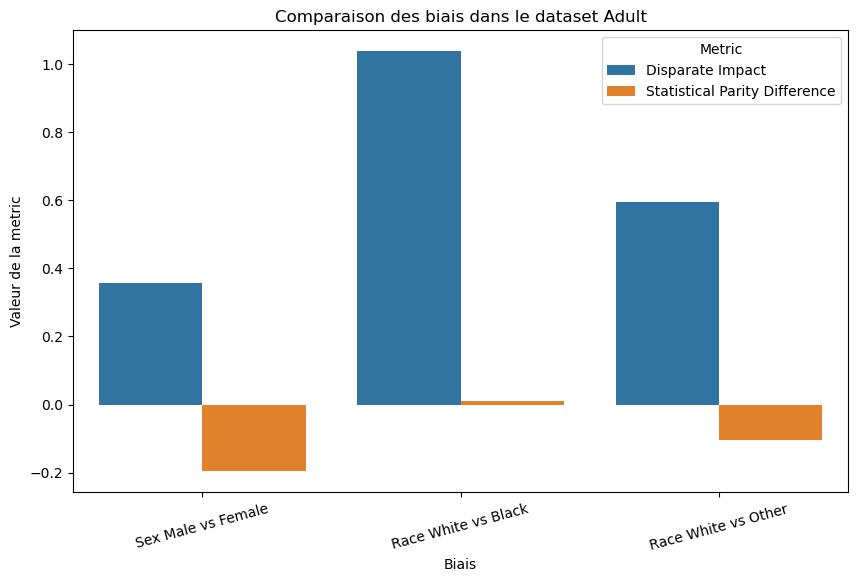

In [202]:
# -----------------------------
# 3️⃣ Créer un BinaryLabelDataset
# -----------------------------
dataset = BinaryLabelDataset(
    df=data,
    label_names=["target"],
    protected_attribute_names=["sex", "race"]
)

# -----------------------------
# 4️⃣ Calculer les metrics
# -----------------------------
def compute_metrics(dataset, protected_attr, privileged_val, unprivileged_val):
    metric = BinaryLabelDatasetMetric(
        dataset,
        privileged_groups=[{protected_attr: privileged_val}],
        unprivileged_groups=[{protected_attr: unprivileged_val}]
    )
    return metric.disparate_impact(), metric.mean_difference()

# Sexe : Male(1) vs Female(0)
sex_DI, sex_SPD = compute_metrics(dataset, "sex", 1, 0)

# Race : White(4) vs Black(1)  (selon LabelEncoder)
race_black_DI, race_black_SPD = compute_metrics(dataset, "race", 4, 1)

# Race : White(4) vs Other (tout sauf White=4) => créer un masque
other_mask = ~data["race"].isin([4])
data_other = data.copy()
data_other.loc[other_mask, "race"] = 0  # 0 = unprivileged group
dataset_other = BinaryLabelDataset(df=data_other, label_names=["target"], protected_attribute_names=["race"])
race_other_DI, race_other_SPD = compute_metrics(dataset_other, "race", 4, 0)

# -----------------------------
# 5️⃣ Créer un DataFrame pour le barplot
# -----------------------------
metrics_df = pd.DataFrame({
    "Biais": ["Sex Male vs Female", "Race White vs Black", "Race White vs Other"],
    "Disparate Impact": [sex_DI, race_black_DI, race_other_DI],
    "Statistical Parity Difference": [sex_SPD, race_black_SPD, race_other_SPD]
})

# -----------------------------
# 6️⃣ Barplot
# -----------------------------
plt.figure(figsize=(10,6))
metrics_df_melted = metrics_df.melt(id_vars="Biais", var_name="Metric", value_name="Value")
sns.barplot(x="Biais", y="Value", hue="Metric", data=metrics_df_melted)
plt.title("Comparaison des biais dans le dataset Adult")
plt.ylabel("Valeur de la metric")
plt.xticks(rotation=15)
plt.show()

In [210]:
import numpy as np

a = np.array([10, 20, 30, 40])
masque = a > 25
print(masque)  # [30 40]



[False False  True  True]


In [213]:
import numpy as np

a = np.array([10, 20, 30, 40])
masque = a > 25
print(a[masque])  # [30 40]
print(masque)
a[masque] = 5
print(a)          # [10 20 0 0]


[30 40]
[False False  True  True]
[10 20  5  5]


In [216]:
for i in range(1,10,2):
    print(i)

1
3
5
7
9


In [244]:
dataset2

NameError: name 'dataset2' is not defined

In [270]:
from aif360.metrics import BinaryLabelDatasetMetric

dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
)   
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

print("DI avant =", metric.disparate_impact())




DI avant = 0.36222035623624405


In [271]:
from aif360.metrics import BinaryLabelDatasetMetric

dataset = BinaryLabelDataset(
    df=data40,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
)   
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

print("DI apres =", metric.disparate_impact())




DI apres = 0.36222035623624405


In [258]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,11,9,4,0,3,4,1,0,0,20,38,0


In [259]:
data40

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,35.0,5.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,213.0,35.0,38.0,0.0
1,43.0,4.0,9.0,13.0,3.0,3.0,0.0,4.0,1.0,1055.0,213.0,12.0,38.0,0.0
2,34.0,2.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,1055.0,213.0,35.0,38.0,0.0
3,49.0,2.0,1.0,7.0,3.0,5.0,0.0,2.0,1.0,1055.0,213.0,45.0,38.0,0.0
4,27.0,2.0,9.0,13.0,3.0,9.0,5.0,2.0,0.0,1055.0,213.0,45.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,25.0,2.0,7.0,12.0,3.0,12.0,5.0,4.0,0.0,1055.0,213.0,35.0,38.0,0.0
30158,35.0,2.0,11.0,8.0,3.0,6.0,0.0,4.0,1.0,1055.0,213.0,35.0,38.0,1.0
30159,49.0,2.0,11.0,8.0,6.0,0.0,4.0,4.0,0.0,1055.0,213.0,35.0,38.0,0.0
30160,21.0,2.0,11.0,8.0,4.0,0.0,3.0,4.0,1.0,1055.0,213.0,19.0,38.0,0.0


In [276]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.metrics import BinaryLabelDatasetMetric

# Création du dataset fairness
dataset = BinaryLabelDataset(
    df=data2, 
    label_names=["target"], 
    protected_attribute_names=["sex"]  # ATTENTION : nom exact de la colonne
)

# Réparateur
di = DisparateImpactRemover(repair_level=0.5)
dataset_repaired = di.fit_transform(dataset)

# Métriques
metric_before = BinaryLabelDatasetMetric(dataset,
        privileged_groups=[{'sex': 1}],
        unprivileged_groups=[{'sex': 0}])

metric_after = BinaryLabelDatasetMetric(dataset_repaired,
        privileged_groups=[{'sex': 1}],
        unprivileged_groups=[{'sex': 0}])

print("DI avant =", metric_before.disparate_impact())
print("DI après =", metric_after.disparate_impact())


DI avant = 0.36222035623624405
DI après = 0.36222035623624405


In [273]:
print("Attribut sensible utilisé :", di.sensitive_attribute)


Attribut sensible utilisé : sex


In [274]:
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.metrics import BinaryLabelDatasetMetric

# Charger dataset avec attribut sensible "sex"
dataset = AdultDataset()

# Disparate Impact avant
metric_before = BinaryLabelDatasetMetric(dataset,
        privileged_groups=[{'sex': 1}],
        unprivileged_groups=[{'sex': 0}])
print("DI avant =", metric_before.disparate_impact())

# Appliquer le DisparateImpactRemover
di = DisparateImpactRemover(repair_level=.0)
dataset_repaired = di.fit_transform(dataset)

# Disparate Impact après
metric_after = BinaryLabelDatasetMetric(dataset_repaired,
        privileged_groups=[{'sex': 1}],
        unprivileged_groups=[{'sex': 0}])
print("DI après =", metric_after.disparate_impact())


IOError: [Errno 2] No such file or directory: '/Users/sofianeagounikaci/anaconda3/lib/python3.11/site-packages/aif360/datasets/../data/raw/adult/adult.data'
To use this class, please download the following files:

	https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
	https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
	https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

and place them, as-is, in the folder:

	/Users/sofianeagounikaci/anaconda3/lib/python3.11/site-packages/aif360/data/raw/adult



AttributeError: 'tuple' object has no attribute 'tb_frame'

In [468]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset

dataset = BinaryLabelDataset(df=trainset,
                             label_names=['target'],
                             protected_attribute_names=['sex'])

rw = Reweighing(privileged_groups=[{'sex':0}],
                unprivileged_groups=[{'sex':1}])

dataset_transformed = rw.fit_transform(dataset)

In [469]:
X = dataset_transformed.features

# Labels
y = dataset_transformed.labels.ravel()   # ravel() pour transformer en 1D



X

array([[34.,  2., 15., ...,  0., 40., 38.],
       [51.,  2., 11., ...,  0., 40., 38.],
       [50.,  2., 11., ...,  0., 40., 38.],
       ...,
       [50.,  2.,  9., ...,  0., 45., 38.],
       [49.,  4.,  9., ...,  0., 60., 38.],
       [34.,  2., 11., ...,  0., 35., 38.]])

In [470]:
X = dataset.features
y = dataset.labels.ravel()  # transforme en 1D
columns = dataset.feature_names  # récupère les noms des features

dataset_train = pd.DataFrame(X, columns=columns)
dataset_train["target"] = y


In [471]:
y_train=trainset["target"]
X_train=trainset.drop(["target"],axis=1)
y_test=testset["target"]
X_test=testset.drop(["target"],axis=1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train, sample_weight=dataset_transformed.instance_weights[:24129])

# -----------------------------
# 7️⃣ Prédiction
# -----------------------------
y_pred = rf.predict(X_test)

# -----------------------------
# 8️⃣ Évaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -----------------------------
# 9️⃣ Matrice de confusion + heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# 🔟 Feature importance (barplot)
# -----------------------------
importances = rf.feature_importances_
feature_names = X_test.columns

# Créer un DataFrame pour mieux trier
feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_df)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Accuracy: 0.8465108569534229
Precision: 0.7265563435776202
Recall: 0.6142571618920719
F1 Score: 0.6657039711191336

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4532
           1       0.73      0.61      0.67      1501

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



/var/folders/mn/00nrtk954xz7d4884fwbdgtr0000gn/T/ipykernel_20308/1632924422.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/mn/00nrtk954xz7d4884fwbdgtr0000gn/T/ipykernel_20308/1632924422.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [473]:
X_test["target"]=y_pred

dataset = BinaryLabelDataset(
    df=X_test,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
) 
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3388
Statistical Parity Difference: -0.1763
Base Rate (privileged): 0.2666
Base Rate (unprivileged): 0.0903
Mean Difference: -0.1763


In [449]:
print(dataset_transformed.instance_weights[:10])

[1.0959271  1.0959271  0.84651664 1.0959271  1.0959271  1.0959271
 1.0959271  0.84651664 0.84651664 1.0959271 ]
